In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kurtosis, skew
import re
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor 

pre=pd.read_csv('pretourney_clean.csv', index_col=0)
tourney=pd.read_csv('tourney_final.csv', index_col=0)


In [2]:
pre.head()

Team/Year    Tempo  RankTempo  AdjTempo  RankAdjTempo        OE  \
0    2001 Air Force  57.8957        319   56.5365           320   99.4753   
1        2001 Akron  66.3672        266   66.0571           241  101.8900   
2      2001 Alabama  71.5751        100   69.5947           113  106.1500   
3  2001 Alabama A&M  78.0625          5   74.7798            10   92.9641   
4  2001 Alabama St.  69.1009        185   64.3766           282   99.8084   

   RankOE     AdjOE  RankAdjOE        DE  RankDE     AdjDE  RankAdjDE  \
0     194  103.4550        141  108.4710     286  108.8230        277   
1     137  104.1070        125  108.9820     296  108.3890        269   
2      64  109.1650         50   95.2501      45   94.2399         42   
3     284   89.9840        310   94.4888      37  101.2420        143   
4     191   94.6376        266   90.5706       4   99.1054        108   

      AdjEM  RankAdjEM  seed  
0  -5.36745        208   NaN  
1  -4.28147        198   NaN  
2  14.92560         39   NaN  
3 -11.25750        260   NaN  
4  -4.46782        202  16.0

In [3]:
tourney.head()

Team/Year    Tempo  RankTempo  AdjTempo  RankAdjTempo        OE  \
4      2001 Alabama St.  69.1009        185   64.3766           282   99.8084   
10         2001 Arizona  72.7256         67   71.0643            73  111.0580   
13        2001 Arkansas  74.3192         36   71.3952            62  106.9450   
21             2001 BYU  65.9770        277   66.0401           243  107.6300   
28  2001 Boston College  70.3050        145   68.5354           153  114.0300   

    RankOE     AdjOE  RankAdjOE       DE  RankDE    AdjDE  RankAdjDE  \
4      191   94.6376        266  90.5706       4  99.1054        108   
10      15  116.4690         10  90.7581       5  86.5783          3   
13      52  109.8390         44  92.9369      23  92.6020         25   
21      39  109.4360         46  94.1607      31  93.9034         38   
28       5  117.5420          5  94.3622      35  94.1297         41   

       AdjEM  RankAdjEM  seed  
4   -4.46782        202  16.0  
10  29.89020          4   2.0  
13  17.23740         27   7.0  
21  15.53260         36  12.0  
28  23.41210         11   3.0

Using Regex to remove rankings from raw dataset

In [4]:
maskall=~pre.columns.str.contains('Rank', regex=True)
masktourney=~tourney.columns.str.contains('Rank',regex=True)

predata=pre.loc[:,maskall]
predata.head()

Team/Year    Tempo  AdjTempo        OE     AdjOE        DE  \
0    2001 Air Force  57.8957   56.5365   99.4753  103.4550  108.4710   
1        2001 Akron  66.3672   66.0571  101.8900  104.1070  108.9820   
2      2001 Alabama  71.5751   69.5947  106.1500  109.1650   95.2501   
3  2001 Alabama A&M  78.0625   74.7798   92.9641   89.9840   94.4888   
4  2001 Alabama St.  69.1009   64.3766   99.8084   94.6376   90.5706   

      AdjDE     AdjEM  seed  
0  108.8230  -5.36745   NaN  
1  108.3890  -4.28147   NaN  
2   94.2399  14.92560   NaN  
3  101.2420 -11.25750   NaN  
4   99.1054  -4.46782  16.0

In [5]:
predata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7259 entries, 0 to 7269
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Team/Year  7259 non-null   object 
 1   Tempo      7259 non-null   float64
 2   AdjTempo   7259 non-null   float64
 3   OE         7259 non-null   float64
 4   AdjOE      7259 non-null   float64
 5   DE         7259 non-null   float64
 6   AdjDE      7259 non-null   float64
 7   AdjEM      7259 non-null   float64
 8   seed       1398 non-null   float64
dtypes: float64(8), object(1)
memory usage: 567.1+ KB


In [6]:
tourneydata=tourney.loc[:,masktourney]
tourneydata

Team/Year    Tempo  AdjTempo        OE     AdjOE        DE  \
4        2001 Alabama St.  69.1009   64.3766   99.8084   94.6376   90.5706   
10           2001 Arizona  72.7256   71.0643  111.0580  116.4690   90.7581   
13          2001 Arkansas  74.3192   71.3952  106.9450  109.8390   92.9369   
21               2001 BYU  65.9770   66.0401  107.6300  109.4360   94.1607   
28    2001 Boston College  70.3050   68.5354  114.0300  117.5420   94.3622   
...                   ...      ...       ...       ...       ...       ...   
7242             2023 VCU  68.4320   68.0086  104.3810  107.1950   92.1320   
7246         2023 Vermont  65.4601   64.6048  109.1440  109.7780  100.5940   
7248        2023 Virginia  62.3949   61.5696  108.3340  111.1660   96.2189   
7255   2023 West Virginia  69.8826   68.8537  108.9690  117.1440  101.5110   
7267          2023 Xavier  71.8516   70.3573  112.7880  119.2970  102.9220   

         AdjDE     AdjEM  seed  
4      99.1054  -4.46782  16.0  
10     86.5783  29.89020   2.0  
13     92.6020  17.23740   7.0  
21     93.9034  15.53260  12.0  
28     94.1297  23.41210   3.0  
...        ...       ...   ...  
7242   94.0449  13.14980  12.0  
7246  104.3570   5.42124  15.0  
7248   94.7544  16.41140   4.0  
7255   97.9996  19.14450   9.0  
7267   99.6040  19.69300   3.0  

[1398 rows x 9 columns]

In [7]:
tourneydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1398 entries, 4 to 7267
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Team/Year  1398 non-null   object 
 1   Tempo      1398 non-null   float64
 2   AdjTempo   1398 non-null   float64
 3   OE         1398 non-null   float64
 4   AdjOE      1398 non-null   float64
 5   DE         1398 non-null   float64
 6   AdjDE      1398 non-null   float64
 7   AdjEM      1398 non-null   float64
 8   seed       1398 non-null   float64
dtypes: float64(8), object(1)
memory usage: 109.2+ KB


Univariate Analysis

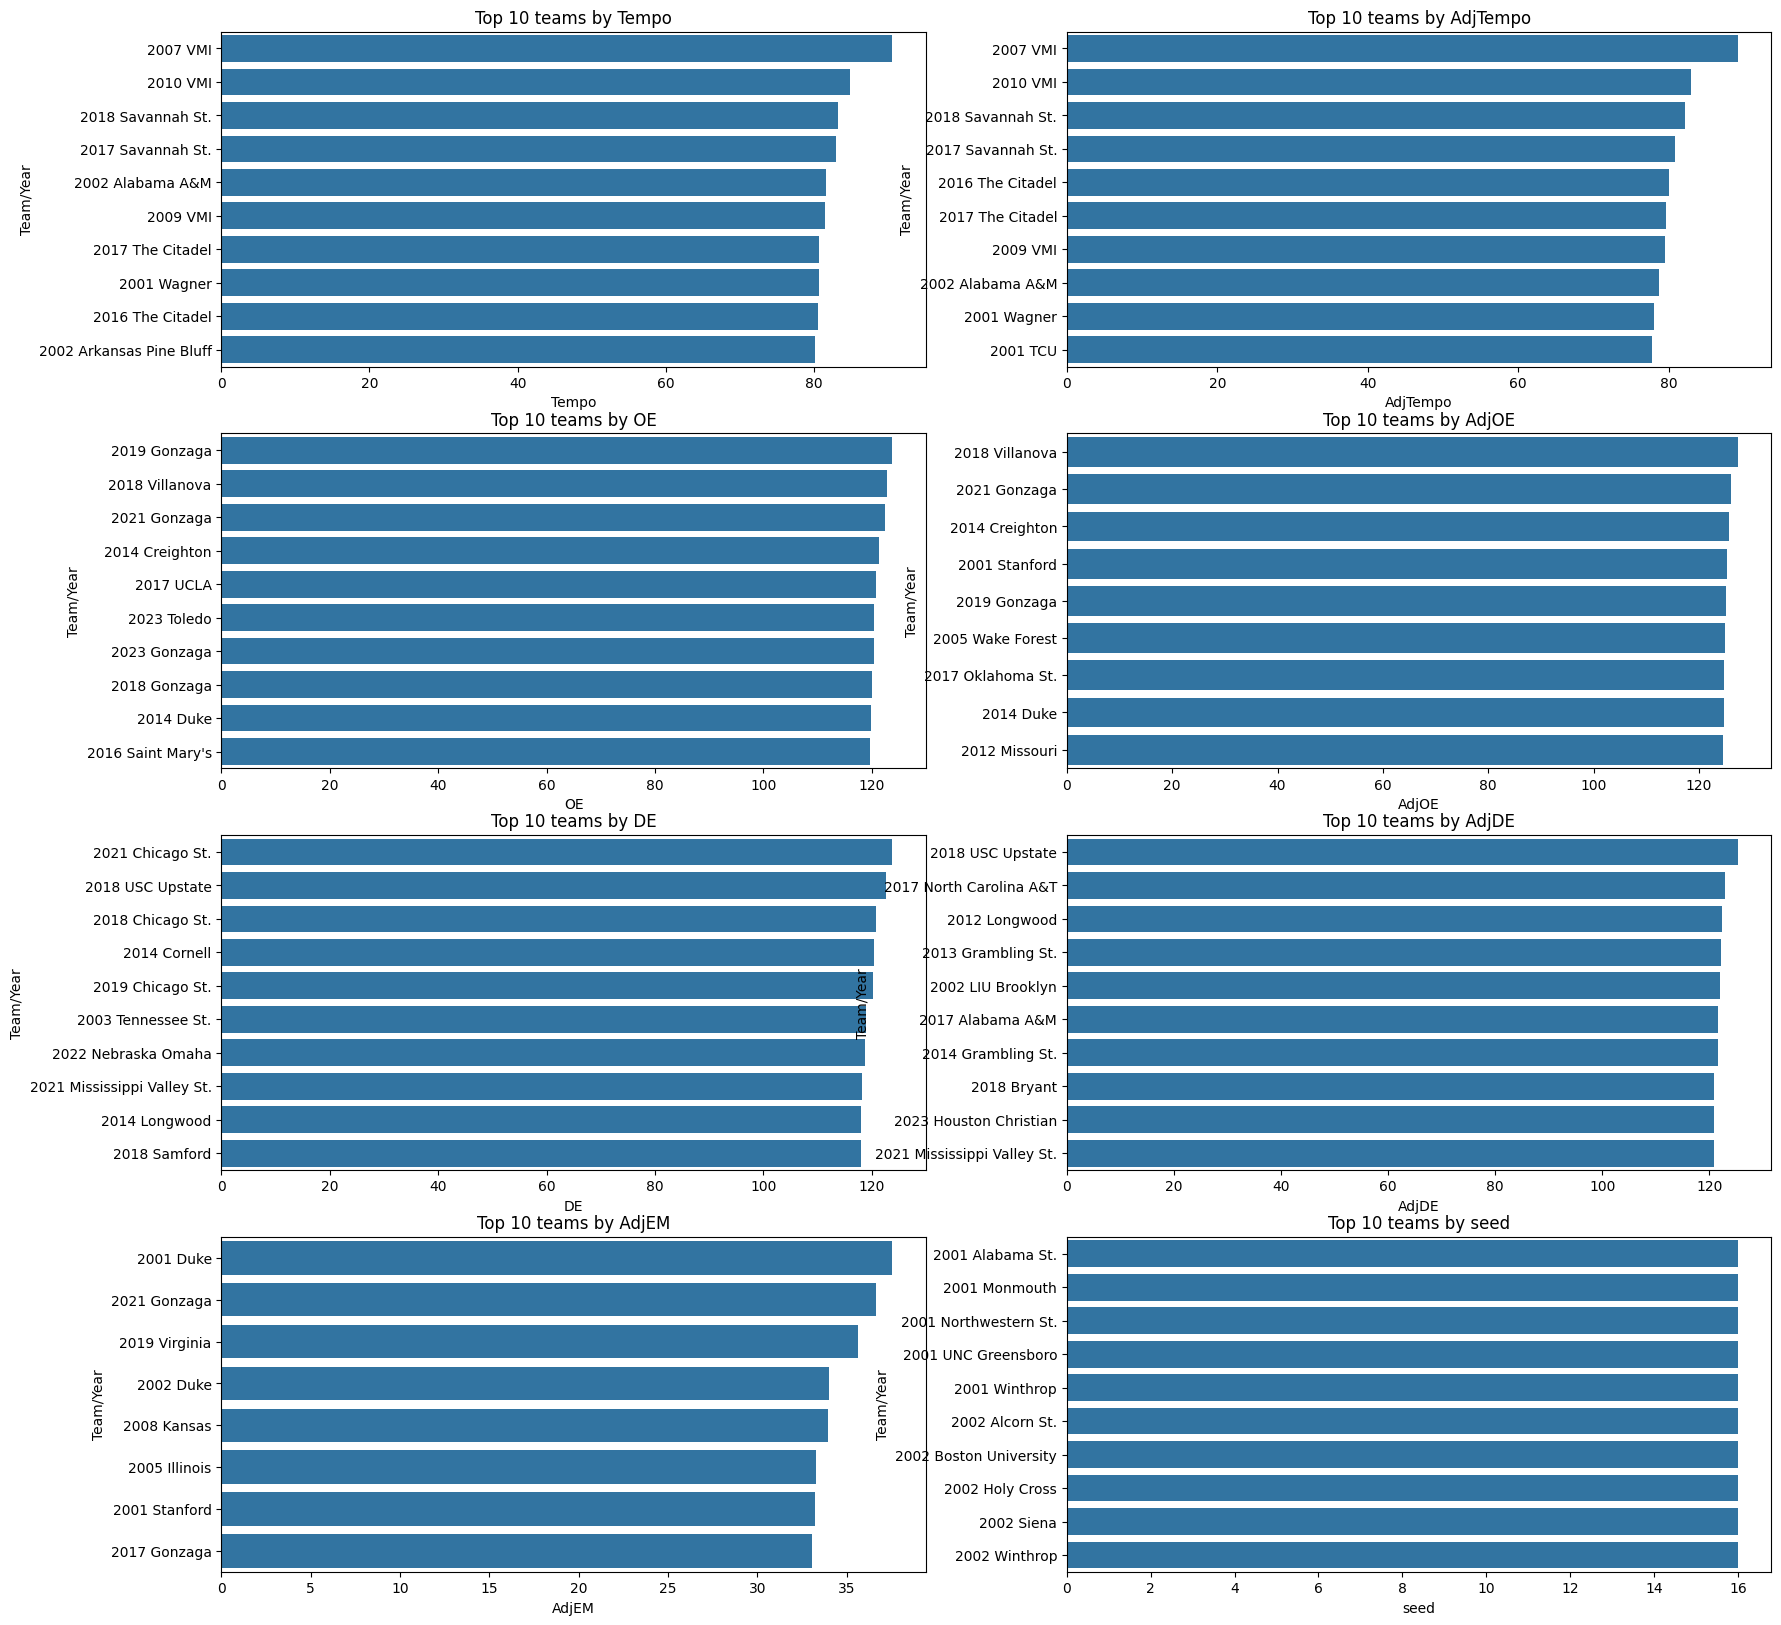

In [8]:
fig,ax=plt.subplots(nrows=4, ncols=2, figsize=(20,20))
ax=ax.flatten()
for i, col in enumerate(predata.select_dtypes(exclude='object').columns):
    top_10=predata.nlargest(10, col)
    sns.barplot(x=top_10[col],y=top_10['Team/Year'], ax=ax[i])
    ax[i].set_title(f'Top 10 teams by {col}')
    ax[i].set_xlabel(f'{col}')
plt.show()

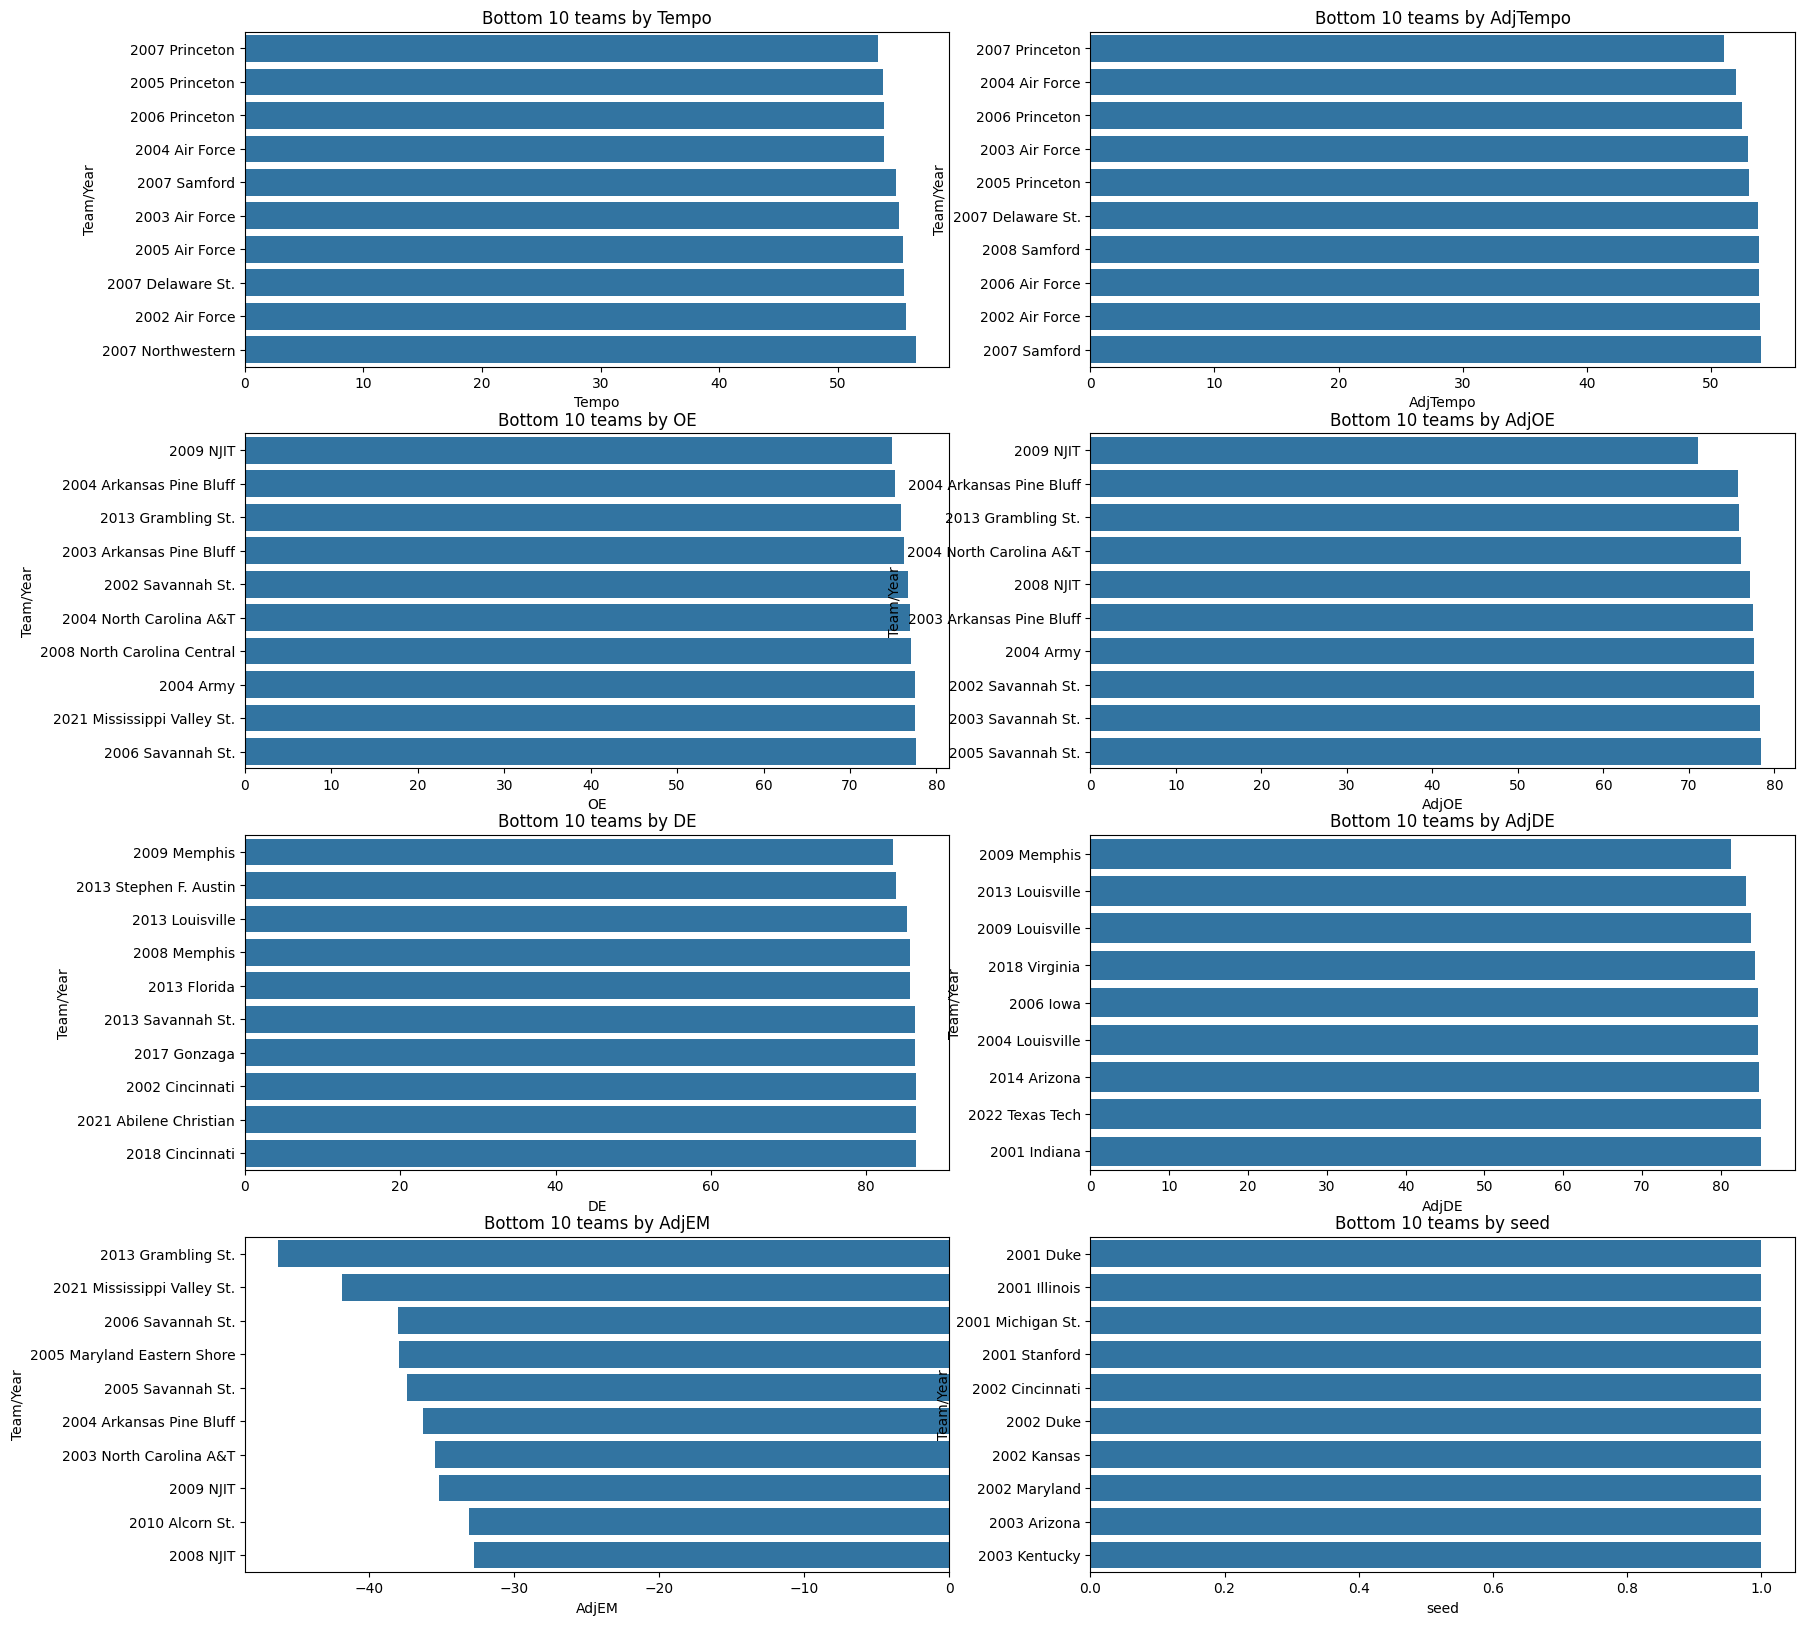

In [9]:
fig,ax=plt.subplots(nrows=4, ncols=2, figsize=(20,20))
ax=ax.flatten()
for i, col in enumerate(predata.select_dtypes(exclude='object').columns):
    top_10=predata.nsmallest(10, col)
    sns.barplot(x=top_10[col],y=top_10['Team/Year'], ax=ax[i])
    ax[i].set_title(f'Bottom 10 teams by {col}')
    ax[i].set_xlabel(f'{col}')
plt.show()

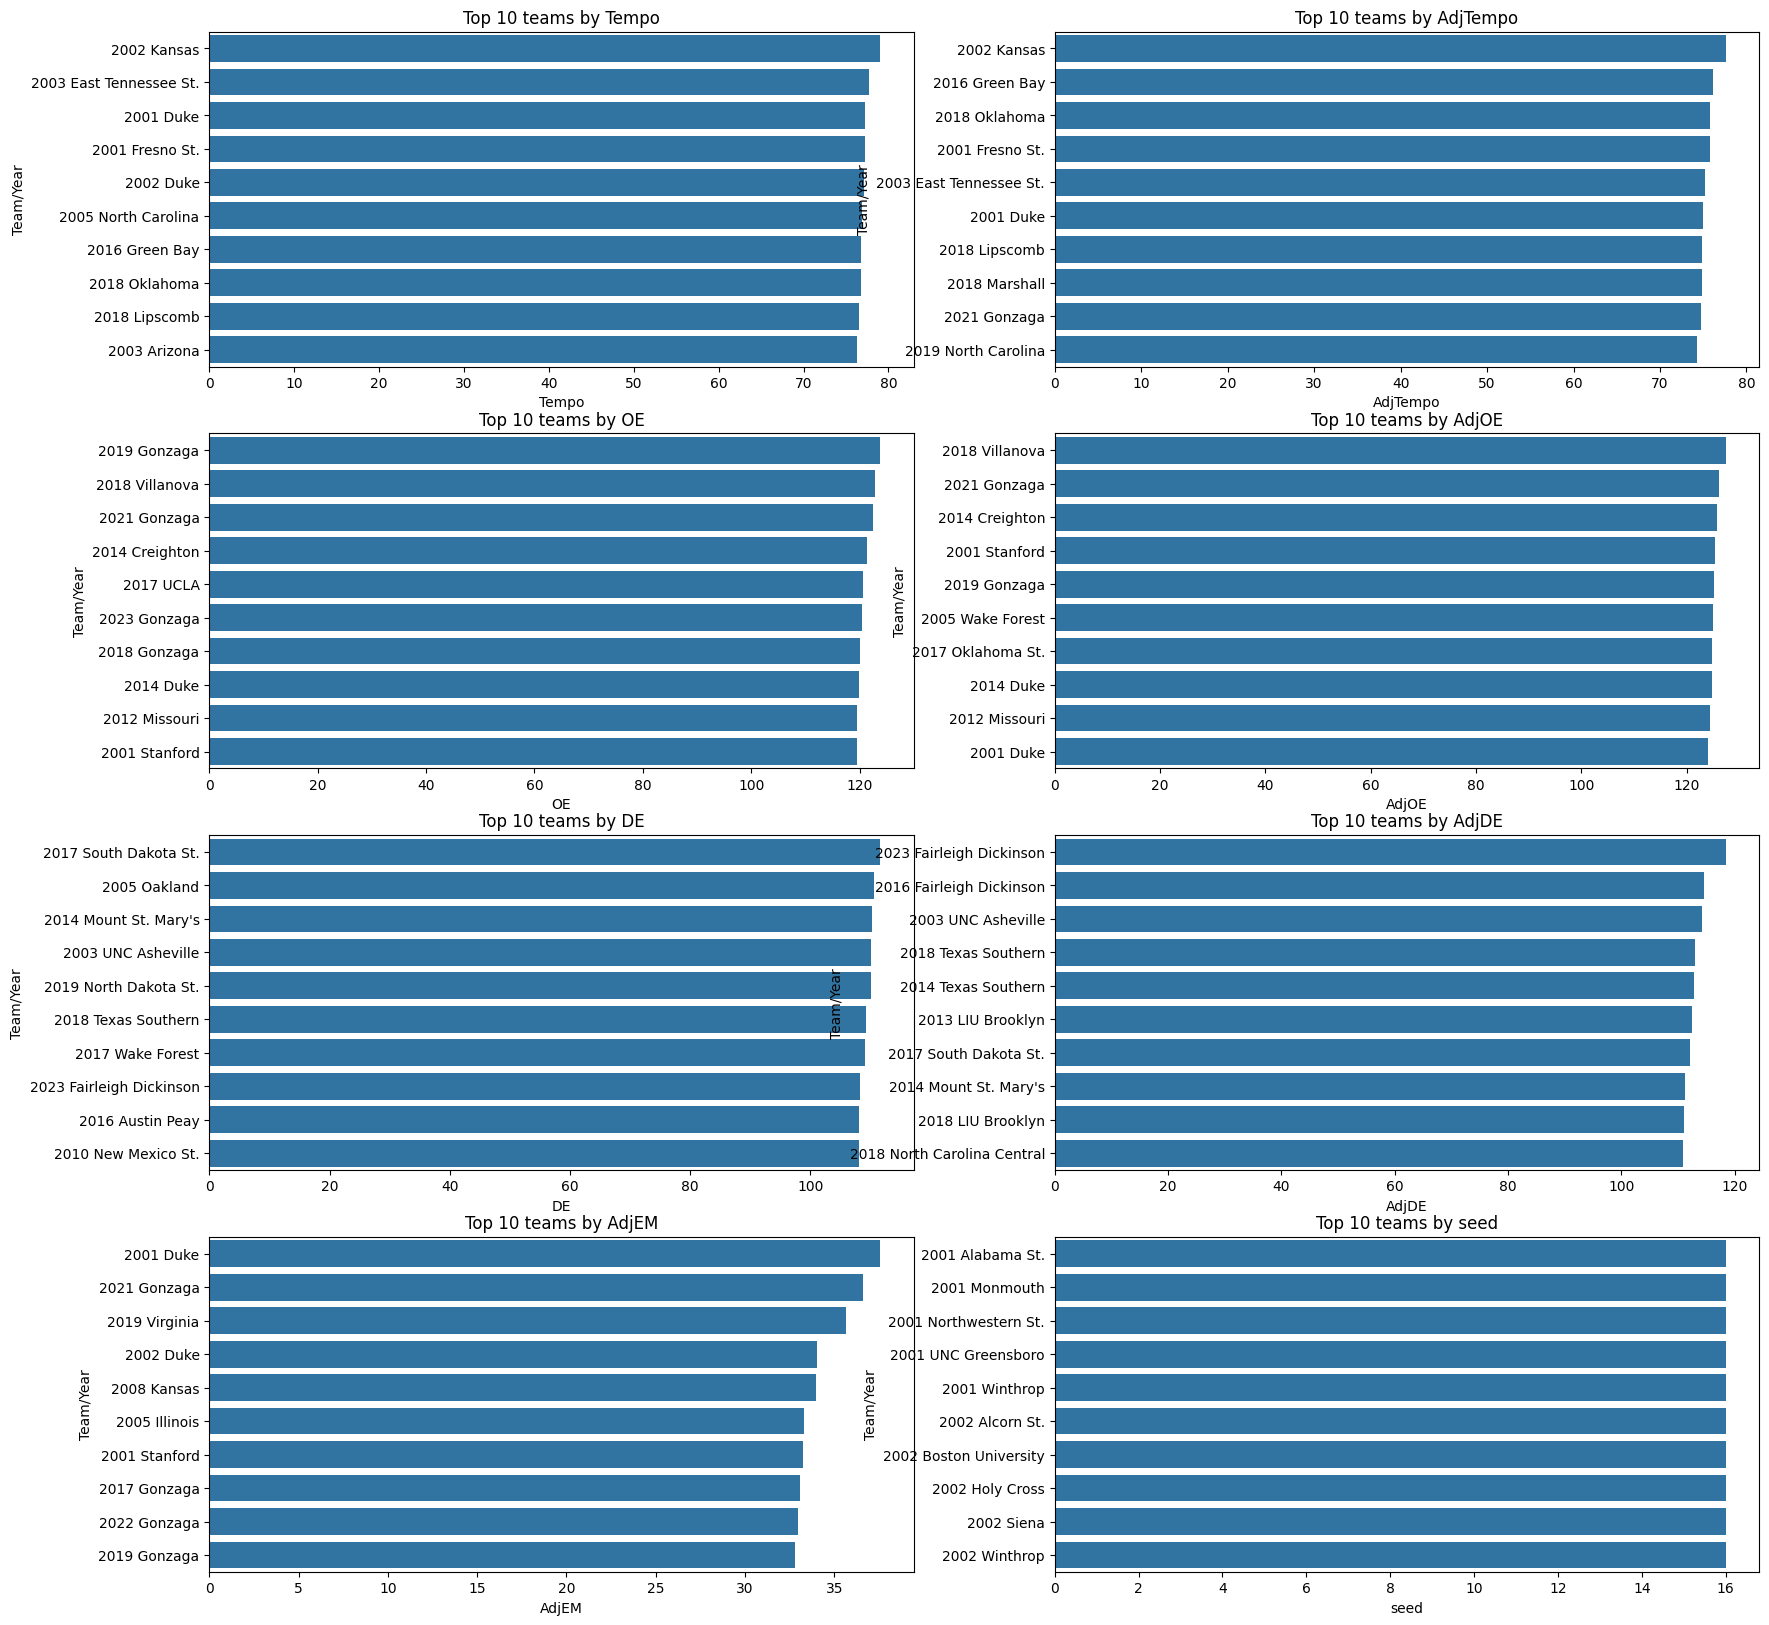

In [10]:
fig,ax=plt.subplots(nrows=4, ncols=2, figsize=(20,20))
ax=ax.flatten()
for i, col in enumerate(tourneydata.select_dtypes(exclude='object').columns):
    top_10=tourneydata.nlargest(10, col)
    sns.barplot(x=top_10[col],y=top_10['Team/Year'], ax=ax[i])
    ax[i].set_title(f'Top 10 teams by {col}')
    ax[i].set_xlabel(f'{col}')
plt.show()

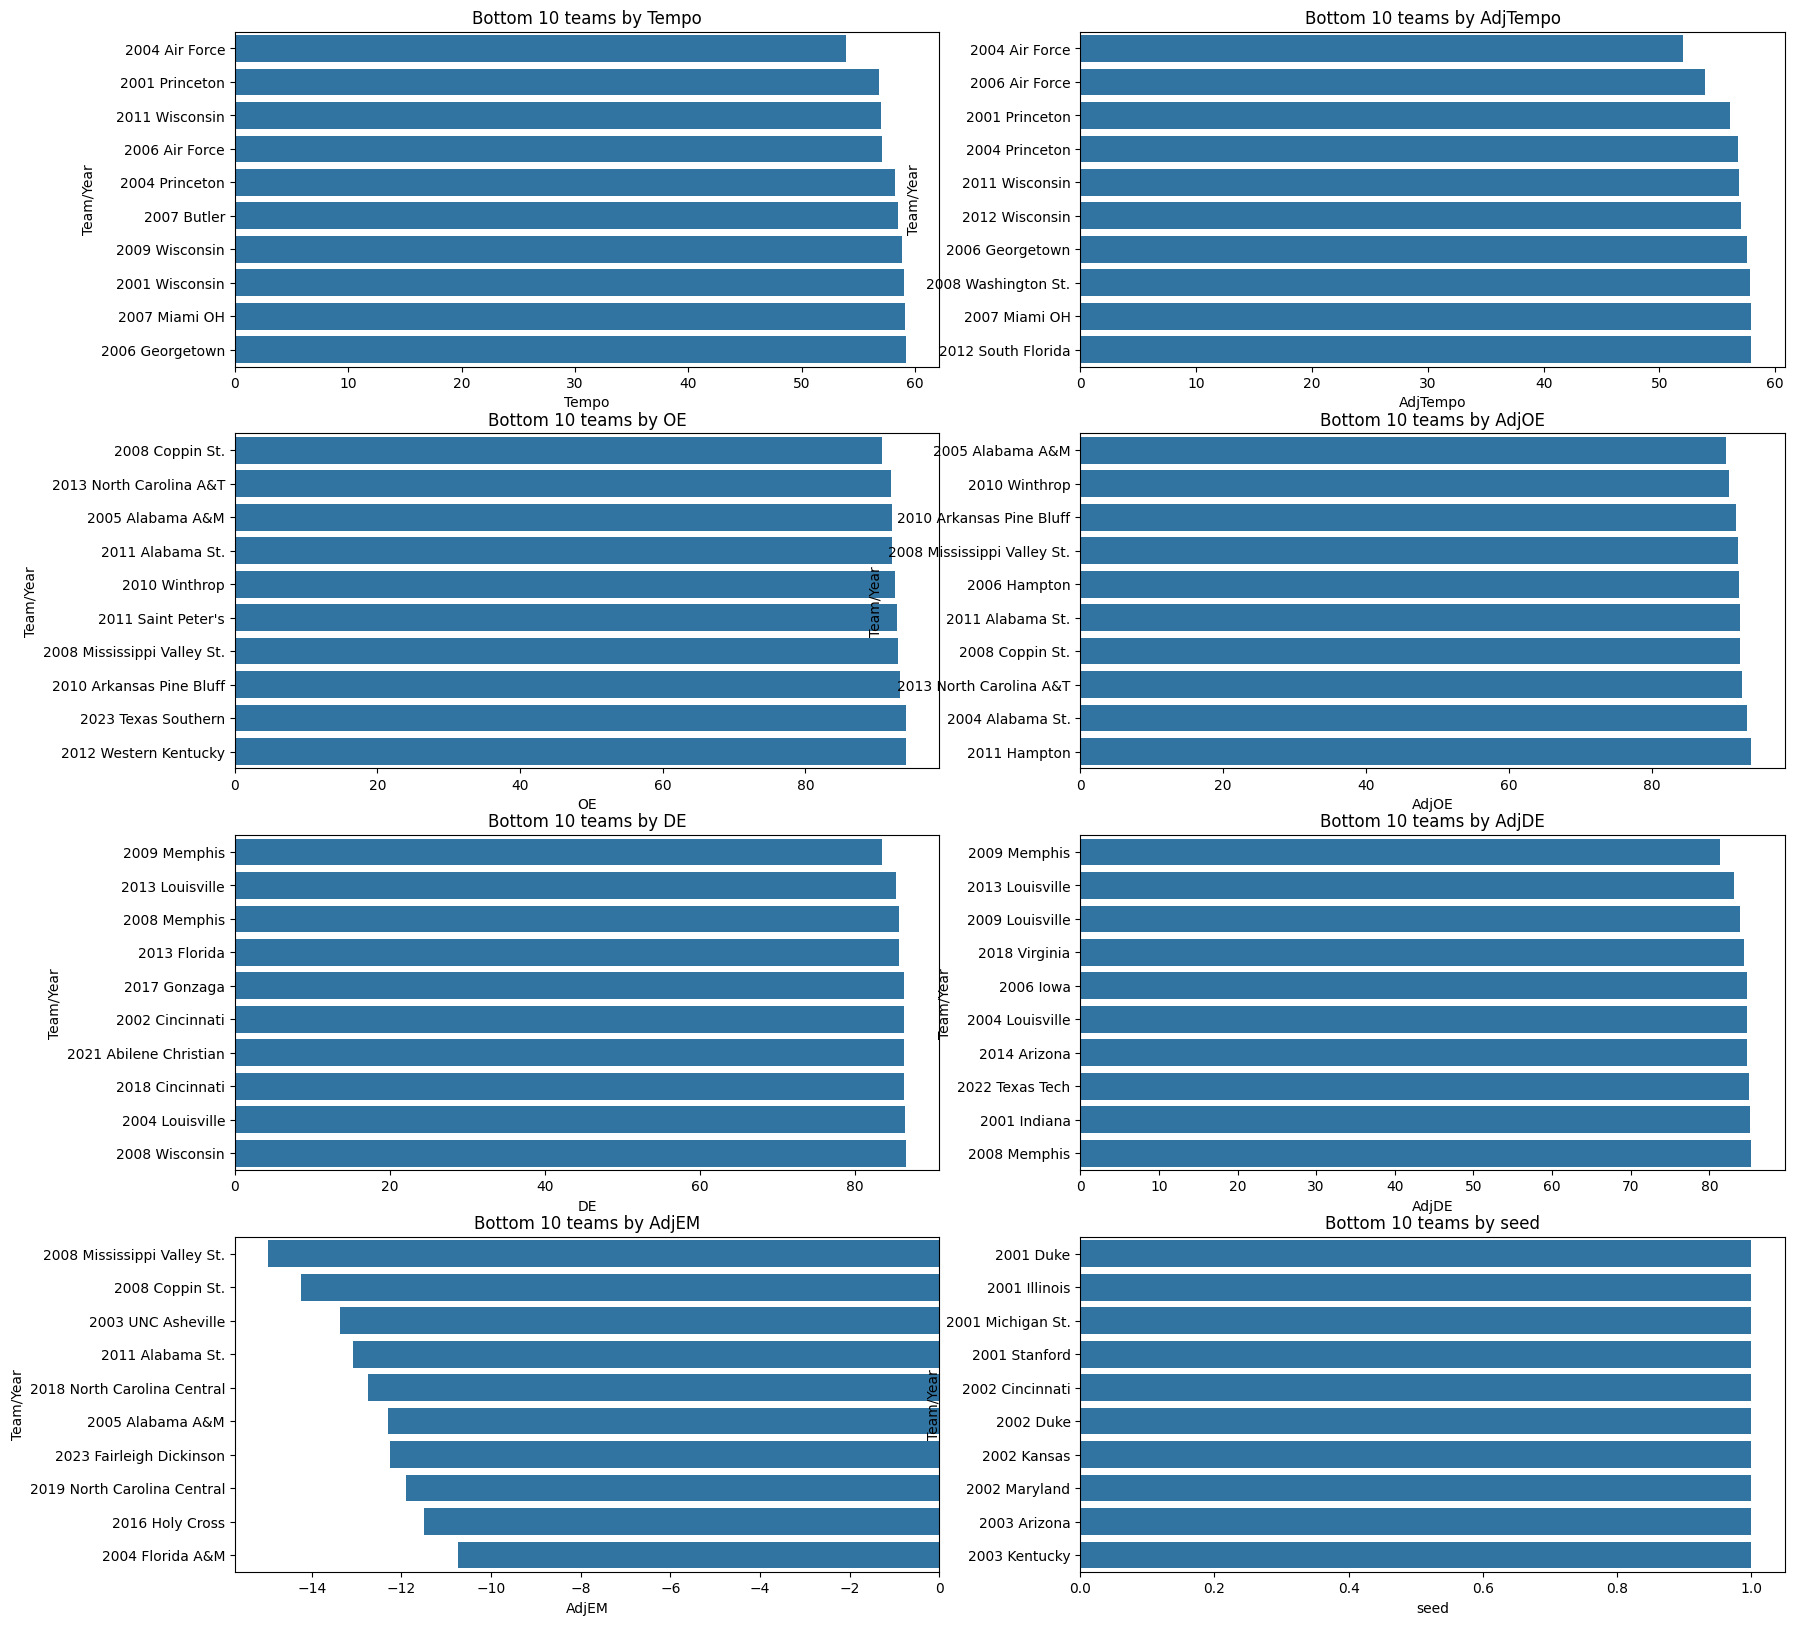

In [11]:
fig,ax=plt.subplots(nrows=4, ncols=2, figsize=(20,20))
ax=ax.flatten()
for i, col in enumerate(tourneydata.select_dtypes(exclude='object').columns):
    top_10=tourneydata.nsmallest(10, col)
    sns.barplot(x=top_10[col],y=top_10['Team/Year'], ax=ax[i])
    ax[i].set_title(f'Bottom 10 teams by {col}')
    ax[i].set_xlabel(f'{col}')
plt.show()

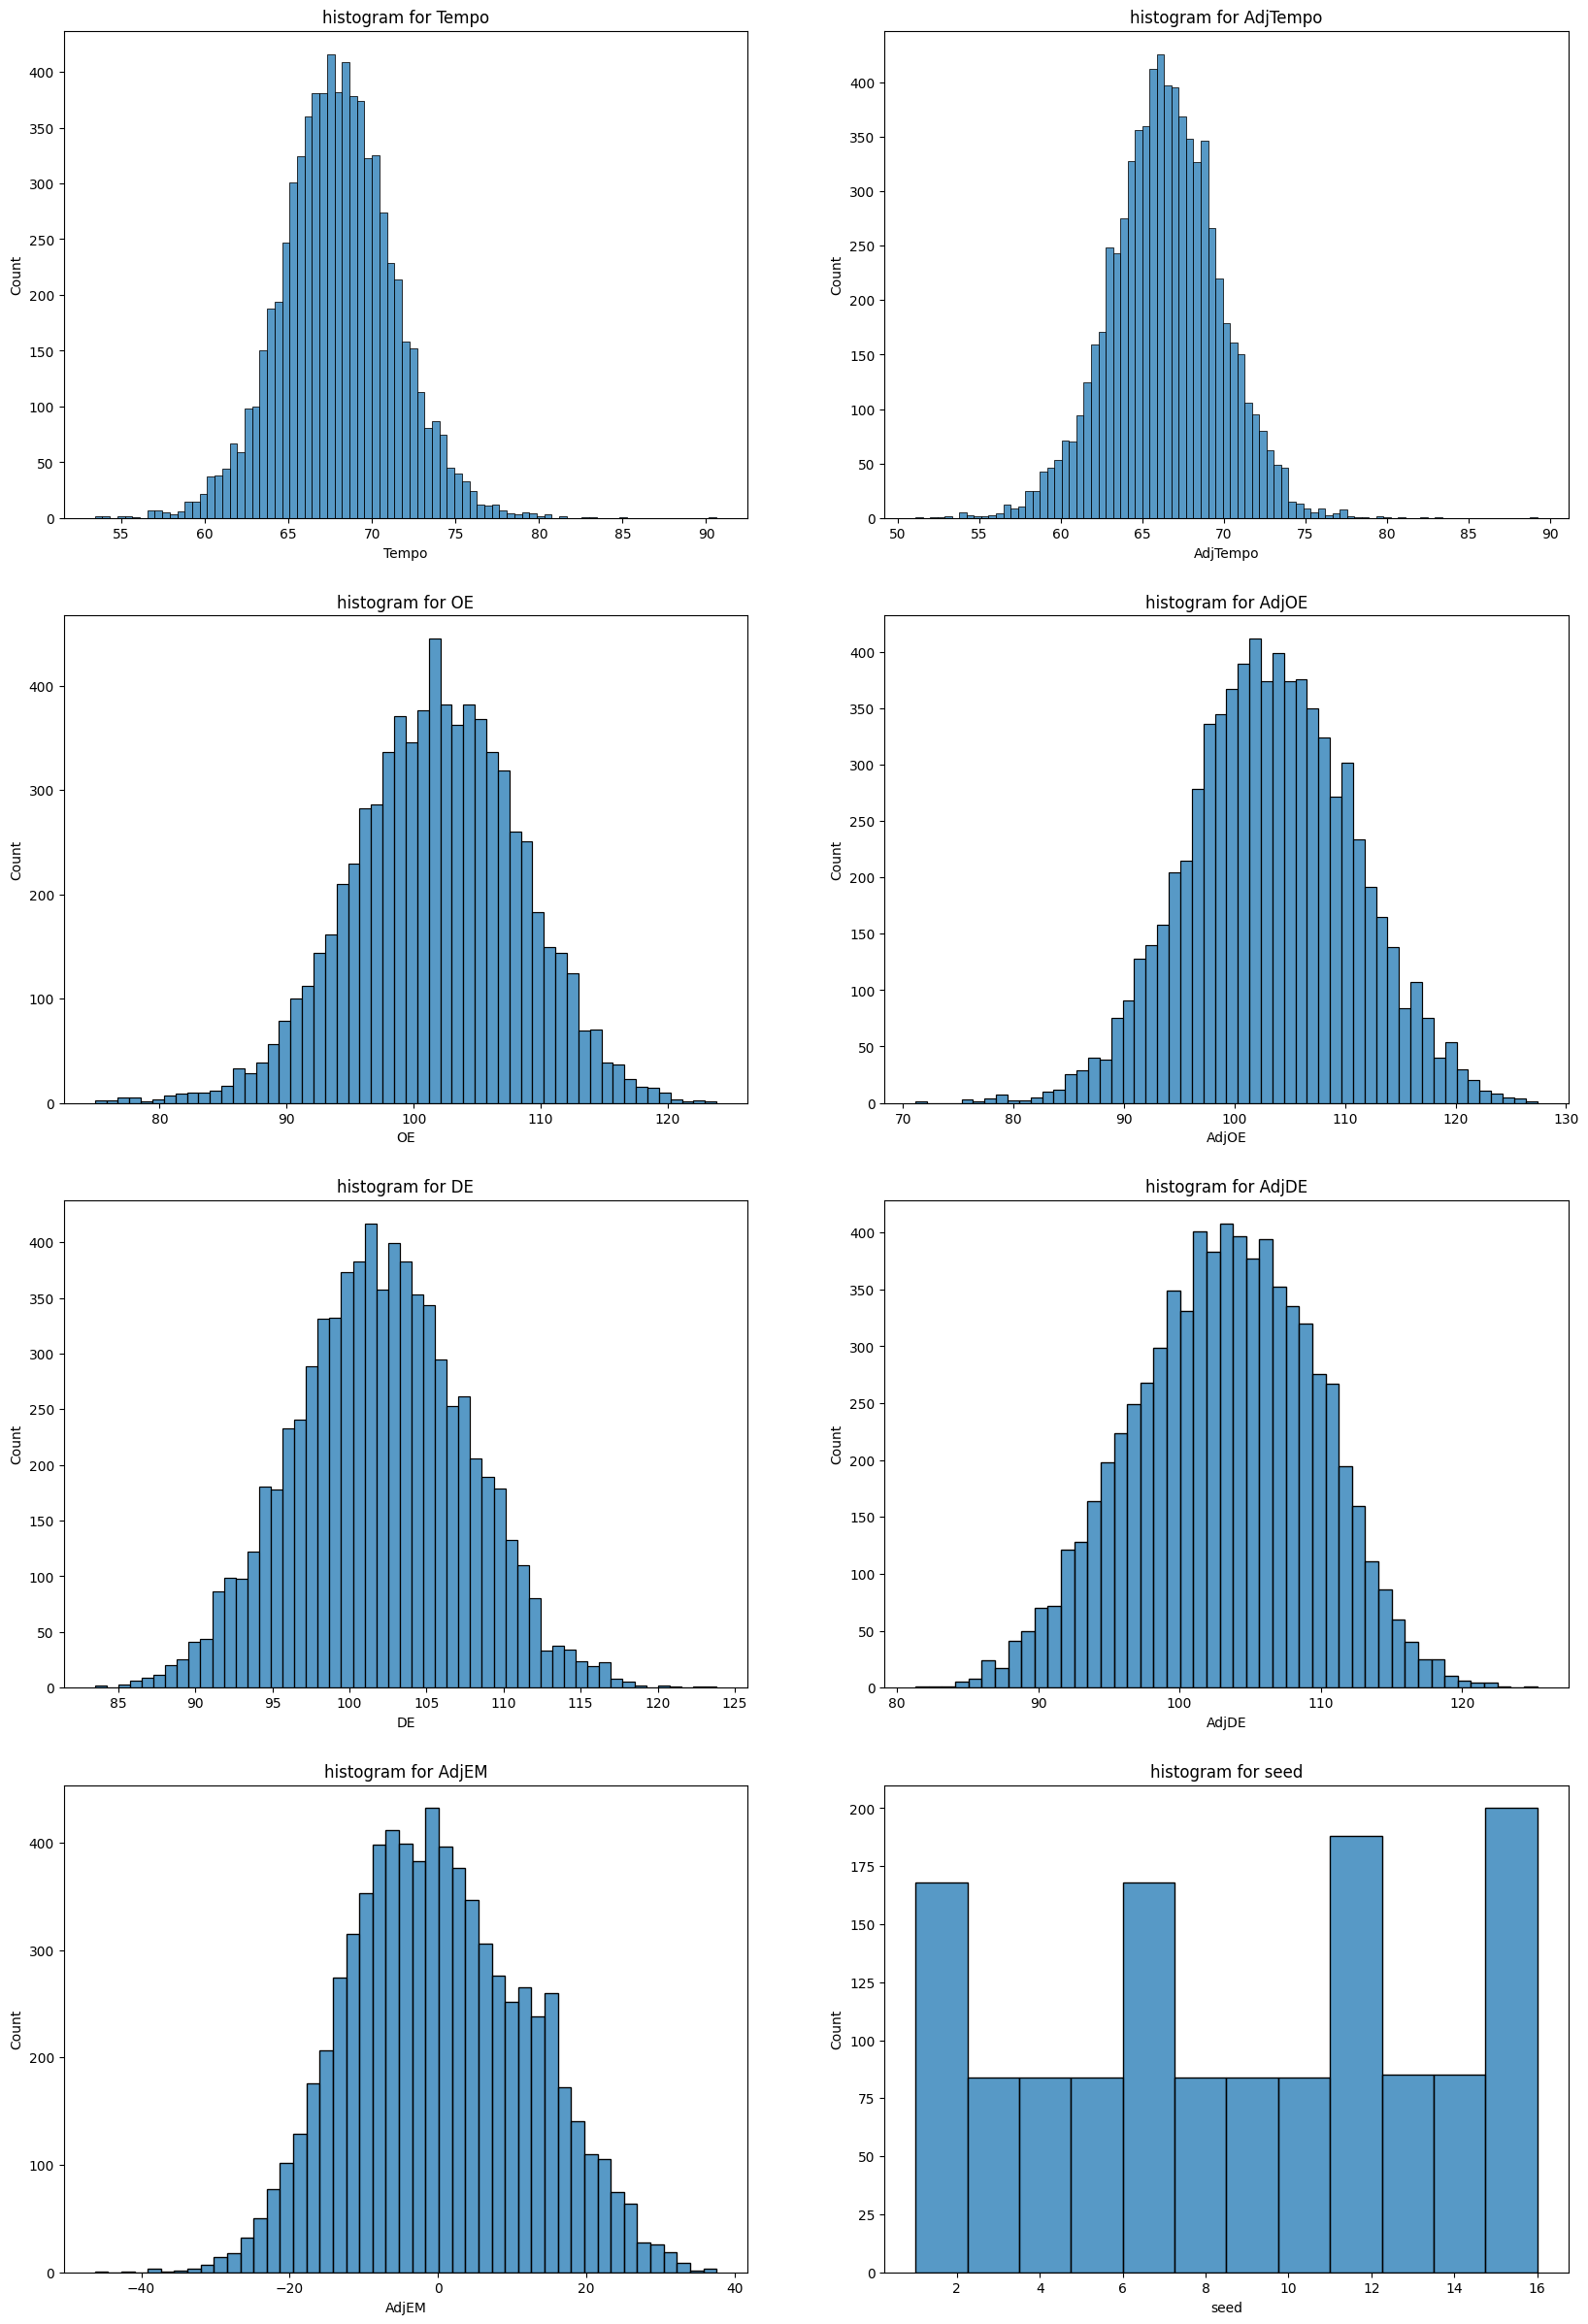

In [12]:
numerical=predata.select_dtypes(exclude='object')
fig, ax=plt.subplots(nrows=4, ncols=2, figsize=(20,30))
ax=ax.flatten()
for i,col in enumerate(numerical.columns): 
    sns.histplot(numerical[col], ax=ax[i])
    ax[i].set_title(f'histogram for {col}')
    
plt.show()

In [13]:
numerical.skew(axis=0, skipna=True)

Tempo       0.080502
AdjTempo   -0.008831
OE         -0.204106
AdjOE      -0.047142
DE          0.020811
AdjDE      -0.129458
AdjEM       0.148075
seed       -0.040264
dtype: float64

In [14]:
numerical.kurtosis(axis=0, skipna=True)

Tempo       0.947400
AdjTempo    0.875946
OE          0.225959
AdjOE       0.016665
DE         -0.117460
AdjDE      -0.320435
AdjEM      -0.356868
seed       -1.215679
dtype: float64

In [15]:
FFD=pd.read_csv('FFD_Clean.csv')
FFO=pd.read_csv('FFO_Clean.csv')
for col in FFD.columns:
    if col !='Team/Year':
        FFD.rename(columns={col:f'Opp{col}'}, inplace=True)
firstmerge=tourneydata.merge(FFD, how='inner', on='Team/Year')
tourneycomplete=firstmerge.merge(FFO, how='inner',on='Team/Year')
tourneycomplete

Team/Year    Tempo  AdjTempo       OE     AdjOE        DE  \
0               2002 Alabama  69.8636   67.8101  108.436  114.1770   95.2313   
1            2002 Alcorn St.  76.0664   72.5438  103.421   99.7682   99.6370   
2               2002 Arizona  74.1462   71.2261  111.008  119.2120  104.0410   
3        2002 Boston College  70.6985   69.0270  103.707  109.5160   99.2527   
4     2002 Boston University  65.0025   64.2616  102.661  100.9710   95.6198   
...                      ...      ...       ...      ...       ...       ...   
1328                2023 VCU  68.4320   68.0086  104.381  107.1950   92.1320   
1329            2023 Vermont  65.4601   64.6048  109.144  109.7780  100.5940   
1330           2023 Virginia  62.3949   61.5696  108.334  111.1660   96.2189   
1331      2023 West Virginia  69.8826   68.8537  108.969  117.1440  101.5110   
1332             2023 Xavier  71.8516   70.3573  112.788  119.2970  102.9220   

         AdjDE     AdjEM  seed  OppeFGPct   OppTOPct   OppORPct  OppFTRate  \
0      94.1585  20.01810   2.0  46.017700  22.033500  34.894300  33.284200   
1     108.1700  -8.40177  16.0  48.726800  21.550500  33.333300  35.066300   
2      97.3917  21.81990   3.0  49.237700  18.289000  35.976100  28.520200   
3      99.2719  10.24390  11.0  47.470100  22.563600  37.887700  42.328600   
4     103.1680  -2.19695  16.0  45.454500  19.870000  32.013500  37.215900   
...        ...       ...   ...        ...        ...        ...        ...   
1328   94.0449  13.14980  12.0  46.899632  23.944075  29.958159  31.108776   
1329  104.3570   5.42124  15.0  51.043383  16.588859  22.316384  26.908292   
1330   94.7544  16.41140   4.0  48.281887  19.478597  24.881292  26.324985   
1331   97.9996  19.14450   9.0  50.888530  20.882782  29.319853  38.664513   
1332   99.6040  19.69300   3.0  50.284464  16.239932  25.018450  27.045952   

         eFGPct      TOPct      ORPct     FTRate  
0     49.179100  20.026700  40.173600  40.753300  
1     50.692600  22.587000  39.459900  40.490100  
2     52.156900  18.964900  35.332800  44.607800  
3     47.412400  19.748600  37.355400  40.564600  
4     48.075800  19.727400  34.902300  36.842100  
...         ...        ...        ...        ...  
1328  51.955008  19.590607  28.851291  41.564006  
1329  54.833424  14.251754  19.234450  28.126707  
1330  51.161473  13.630185  25.609756  34.730878  
1331  51.510497  18.525048  34.014210  39.375320  
1332  55.230496  17.175412  30.744337  31.382979  

[1333 rows x 17 columns]

In [16]:
popper=tourneycomplete.pop('seed')
tourneycomplete.insert(0,'seed',popper)

Bivariate Analysis

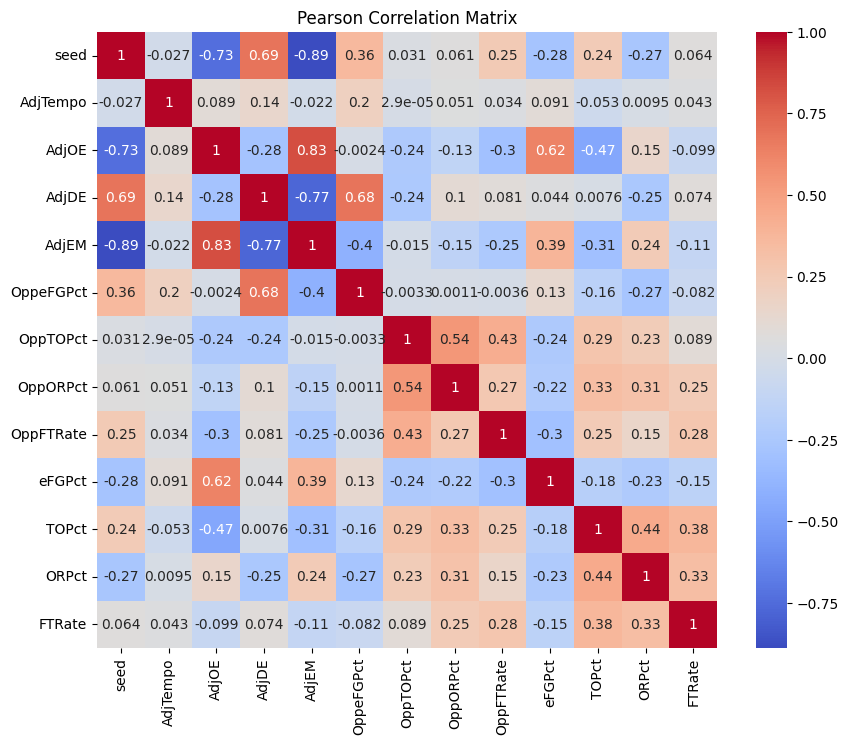

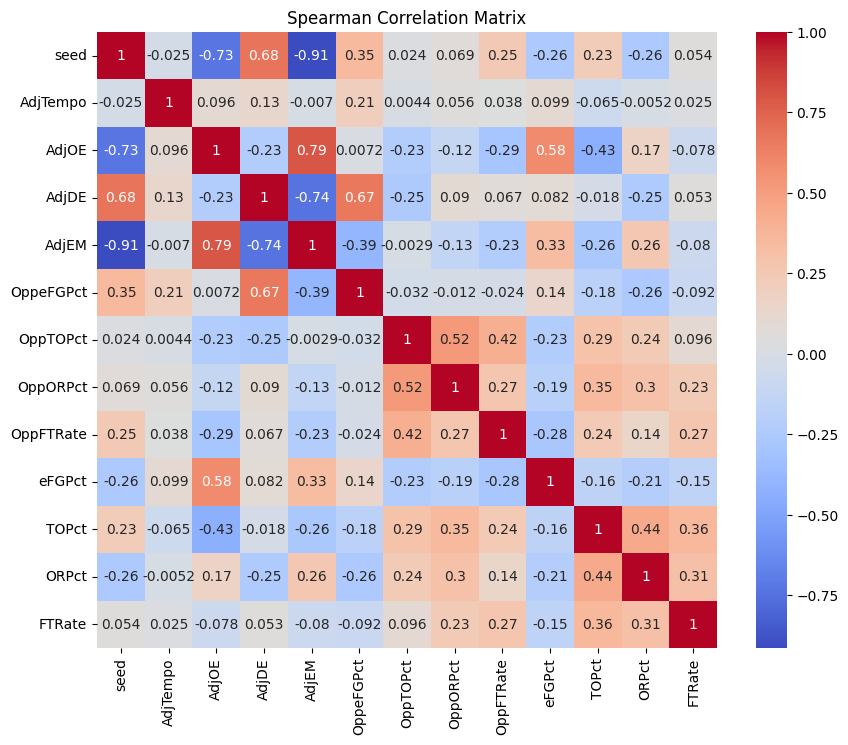

In [23]:
correlators=tourneycomplete.select_dtypes(exclude='object')
pearson=correlators.corr(method='pearson')
spearman=correlators.corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(pearson, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(spearman, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

We need to drop the columns with lots of multicollinearity 

In [18]:
tourneycomplete.drop(columns=['Tempo','OE','DE'], inplace=True)

In [19]:
tourneycomplete.head()

seed               Team/Year  AdjTempo     AdjOE     AdjDE     AdjEM  \
0   2.0            2002 Alabama   67.8101  114.1770   94.1585  20.01810   
1  16.0         2002 Alcorn St.   72.5438   99.7682  108.1700  -8.40177   
2   3.0            2002 Arizona   71.2261  119.2120   97.3917  21.81990   
3  11.0     2002 Boston College   69.0270  109.5160   99.2719  10.24390   
4  16.0  2002 Boston University   64.2616  100.9710  103.1680  -2.19695   

   OppeFGPct  OppTOPct  OppORPct  OppFTRate   eFGPct    TOPct    ORPct  \
0    46.0177   22.0335   34.8943    33.2842  49.1791  20.0267  40.1736   
1    48.7268   21.5505   33.3333    35.0663  50.6926  22.5870  39.4599   
2    49.2377   18.2890   35.9761    28.5202  52.1569  18.9649  35.3328   
3    47.4701   22.5636   37.8877    42.3286  47.4124  19.7486  37.3554   
4    45.4545   19.8700   32.0135    37.2159  48.0758  19.7274  34.9023   

    FTRate  
0  40.7533  
1  40.4901  
2  44.6078  
3  40.5646  
4  36.8421

Checking for Multicollinearity

     features           VIF
0        seed  2.299357e+01
1    AdjTempo  4.152493e+02
2       AdjOE  1.236183e+11
3       AdjDE  9.281180e+10
4       AdjEM  2.991806e+09
5   OppeFGPct  1.376175e+03
6    OppTOPct  1.674678e+02
7    OppORPct  1.821156e+02
8   OppFTRate  5.289209e+01
9      eFGPct  1.546498e+03
10      TOPct  1.921705e+02
11      ORPct  1.758298e+02
12     FTRate  6.604542e+01


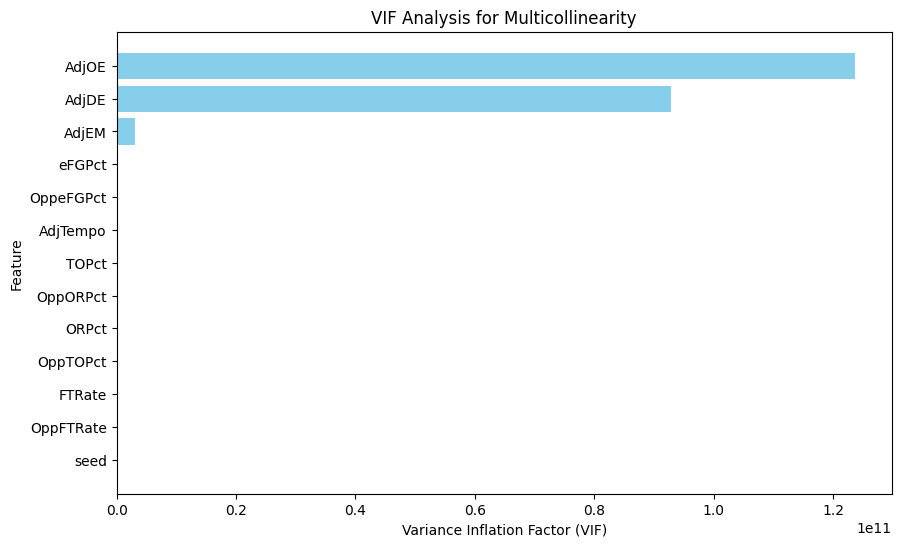

In [20]:
copy=tourneycomplete.select_dtypes(exclude='object')
vif_data=pd.DataFrame()
vif_data['features']=copy.columns
vif_data['VIF']=[variance_inflation_factor(copy.values,i) for i in range(len(copy.columns))]
print(vif_data)

vif_data = vif_data.sort_values(by="VIF", ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(vif_data["features"], vif_data["VIF"], color="skyblue")
plt.xlabel("Variance Inflation Factor (VIF)")
plt.ylabel("Feature")
plt.title("VIF Analysis for Multicollinearity")
plt.gca().invert_yaxis()  
plt.show()

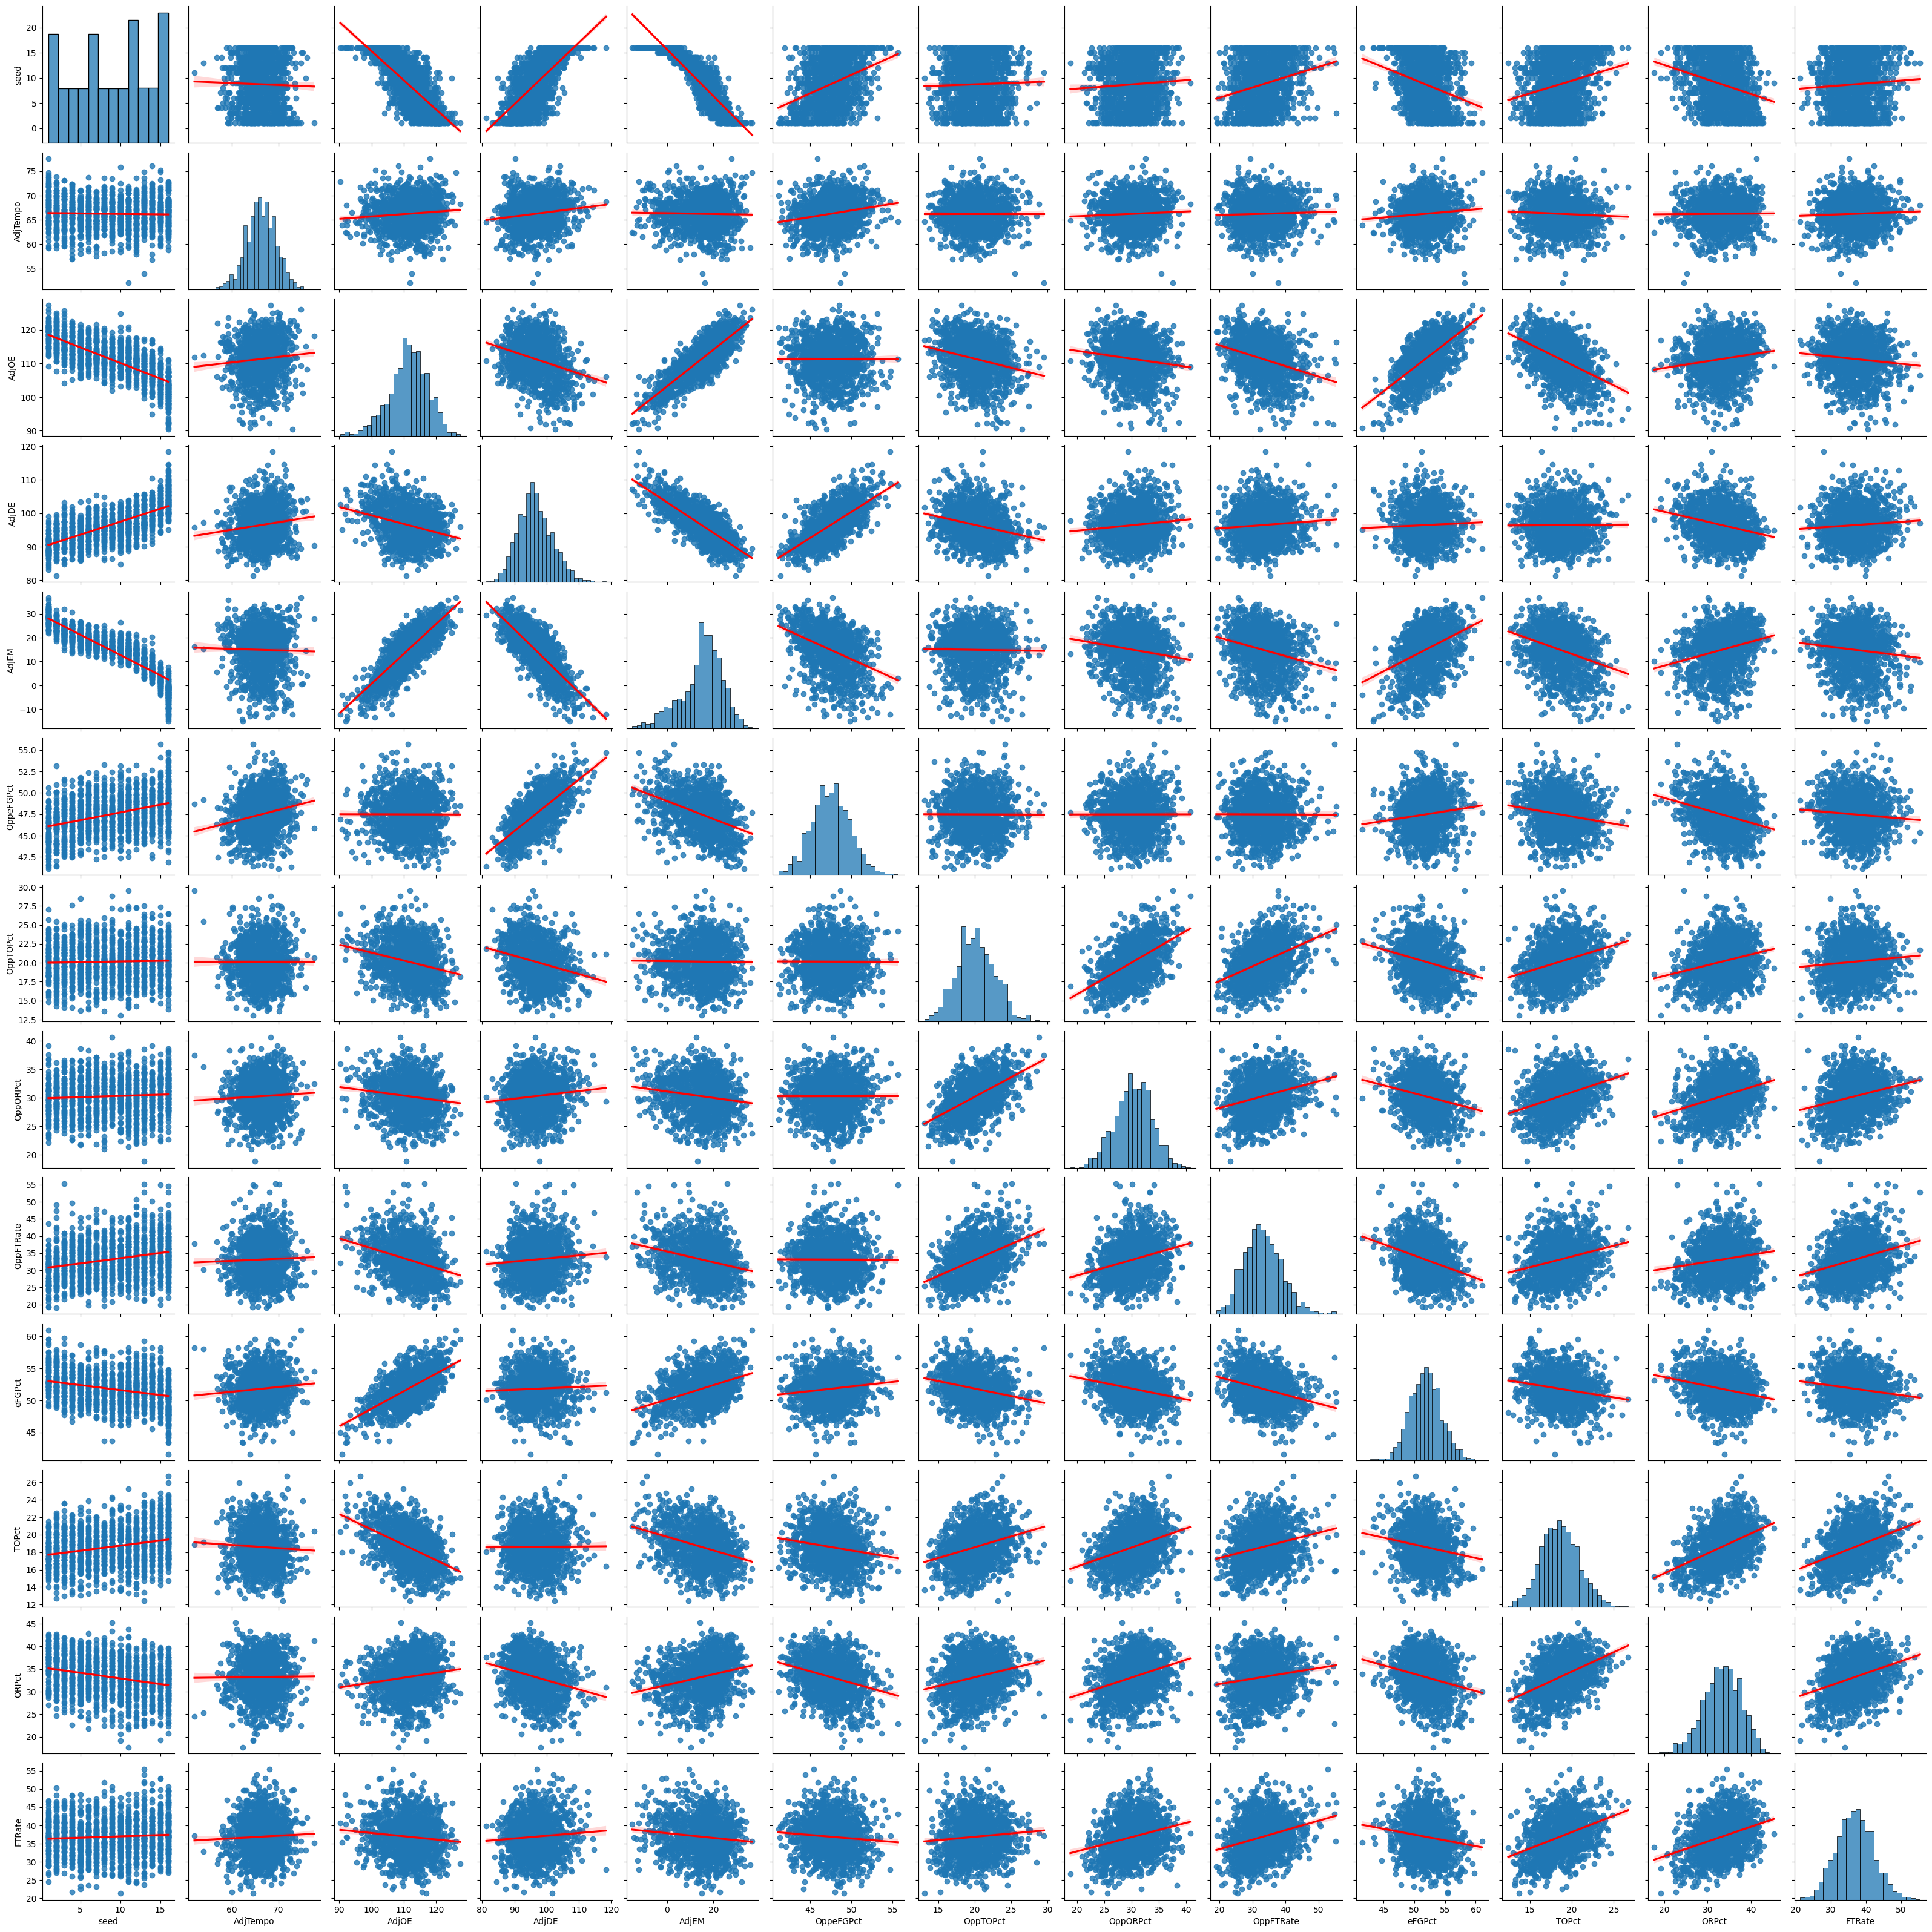

In [24]:
sns.pairplot(copy, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [26]:
tourneycomplete.to_csv('modelready.csv', index=False)

When we merged the datasets, the totals changed; running a quick check reminds us that KepPom doesnt provide four factor data before 2002.

In [21]:
tourneytotal=tourneydata.merge(tourneycomplete, how='left', on='Team/Year', indicator=True)
only=tourneytotal[tourneytotal['_merge']=='left_only']

In [22]:
only

Team/Year    Tempo  AdjTempo_x        OE   AdjOE_x       DE  \
0        2001 Alabama St.  69.1009     64.3766   99.8084   94.6376  90.5706   
1            2001 Arizona  72.7256     71.0643  111.0580  116.4690  90.7581   
2           2001 Arkansas  74.3192     71.3952  106.9450  109.8390  92.9369   
3                2001 BYU  65.9770     66.0401  107.6300  109.4360  94.1607   
4     2001 Boston College  70.3050     68.5354  114.0300  117.5420  94.3622   
..                    ...      ...         ...       ...       ...      ...   
60       2001 Wake Forest  70.4972     67.5562  108.5310  112.4170  93.2251   
61  2001 Western Kentucky  67.7618     67.2937  107.6300  105.9490  91.4201   
62          2001 Winthrop  64.8520     62.5648   99.5826   97.8645  92.8228   
63         2001 Wisconsin  59.0110     58.3966  100.0350  107.5650  95.2630   
64            2001 Xavier  69.8702     69.5891  104.7020  107.8650  93.5085   

    AdjDE_x    AdjEM_x  seed_x  seed_y  ...  AdjEM_y  OppeFGPct  OppTOPct  \
0   99.1054  -4.467820    16.0     NaN  ...      NaN        NaN       NaN   
1   86.5783  29.890200     2.0     NaN  ...      NaN        NaN       NaN   
2   92.6020  17.237400     7.0     NaN  ...      NaN        NaN       NaN   
3   93.9034  15.532600    12.0     NaN  ...      NaN        NaN       NaN   
4   94.1297  23.412100     3.0     NaN  ...      NaN        NaN       NaN   
..      ...        ...     ...     ...  ...      ...        ...       ...   
60  88.5362  23.880500     7.0     NaN  ...      NaN        NaN       NaN   
61  93.2032  12.745500    14.0     NaN  ...      NaN        NaN       NaN   
62  98.4853  -0.620731    16.0     NaN  ...      NaN        NaN       NaN   
63  89.3163  18.248300     6.0     NaN  ...      NaN        NaN       NaN   
64  91.6881  16.176900    11.0     NaN  ...      NaN        NaN       NaN   

    OppORPct  OppFTRate  eFGPct  TOPct  ORPct  FTRate     _merge  
0        NaN        NaN     NaN    NaN    NaN     NaN  left_only  
1        NaN        NaN     NaN    NaN    NaN     NaN  left_only  
2        NaN        NaN     NaN    NaN    NaN     NaN  left_only  
3        NaN        NaN     NaN    NaN    NaN     NaN  left_only  
4        NaN        NaN     NaN    NaN    NaN     NaN  left_only  
..       ...        ...     ...    ...    ...     ...        ...  
60       NaN        NaN     NaN    NaN    NaN     NaN  left_only  
61       NaN        NaN     NaN    NaN    NaN     NaN  left_only  
62       NaN        NaN     NaN    NaN    NaN     NaN  left_only  
63       NaN        NaN     NaN    NaN    NaN     NaN  left_only  
64       NaN        NaN     NaN    NaN    NaN     NaN  left_only  

[65 rows x 23 columns]